In [ ]:
%pip install seaborn
%pip install matplotlib
%pip install scikit-learn
%pip install pandas
%pip install numpy
%pip install scipy
%pip install nltk
%pip install scikit-learn

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [17]:

df = pd.read_csv("./data.csv")

print(f"""
-------------------------
{df.info()}
-------------------------
{df.describe()}
-------------------------
{df.head()}
""")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customerID         7043 non-null   object 
 1   gender             7043 non-null   object 
 2   SeniorCitizen      7043 non-null   int64  
 3   Partner            7043 non-null   object 
 4   Dependents         7043 non-null   object 
 5   tenure             7043 non-null   int64  
 6   PhoneService       7043 non-null   object 
 7   MultipleLines      7043 non-null   object 
 8   InternetService    7043 non-null   object 
 9   InternetService.1  7043 non-null   object 
 10  OnlineBackup       7043 non-null   object 
 11  DeviceProtection   7043 non-null   object 
 12  TechSupport        7043 non-null   object 
 13  StreamingTV        7043 non-null   object 
 14  StreamingMovies    7043 non-null   object 
 15  Contract           7043 non-null   object 
 16  PaperlessBilling   7043 

In [18]:
# Convert categorical columns to numeric
df['gender'] = df['gender'].map({'Male': 1, 'Female': 2})
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0})
df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 0})
df['MultipleLines'] = df['MultipleLines'].map({'Yes': 1, 'No': 0, 'No phone service': 0})
df['OnlineBackup'] = df['OnlineBackup'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
df['DeviceProtection'] = df['DeviceProtection'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
df['TechSupport'] = df['TechSupport'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
df['StreamingTV'] = df['StreamingTV'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
df['StreamingMovies'] = df['StreamingMovies'].map({'Yes': 1, 'No': 0, 'No internet service': 0})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No': 0})

In [19]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,InternetService.1,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,2,0,1,0,1,0,0,DSL,No,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,DSL,Yes,...,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,DSL,Yes,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,0,DSL,Yes,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,2,0,0,0,2,1,0,Fiber optic,No,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


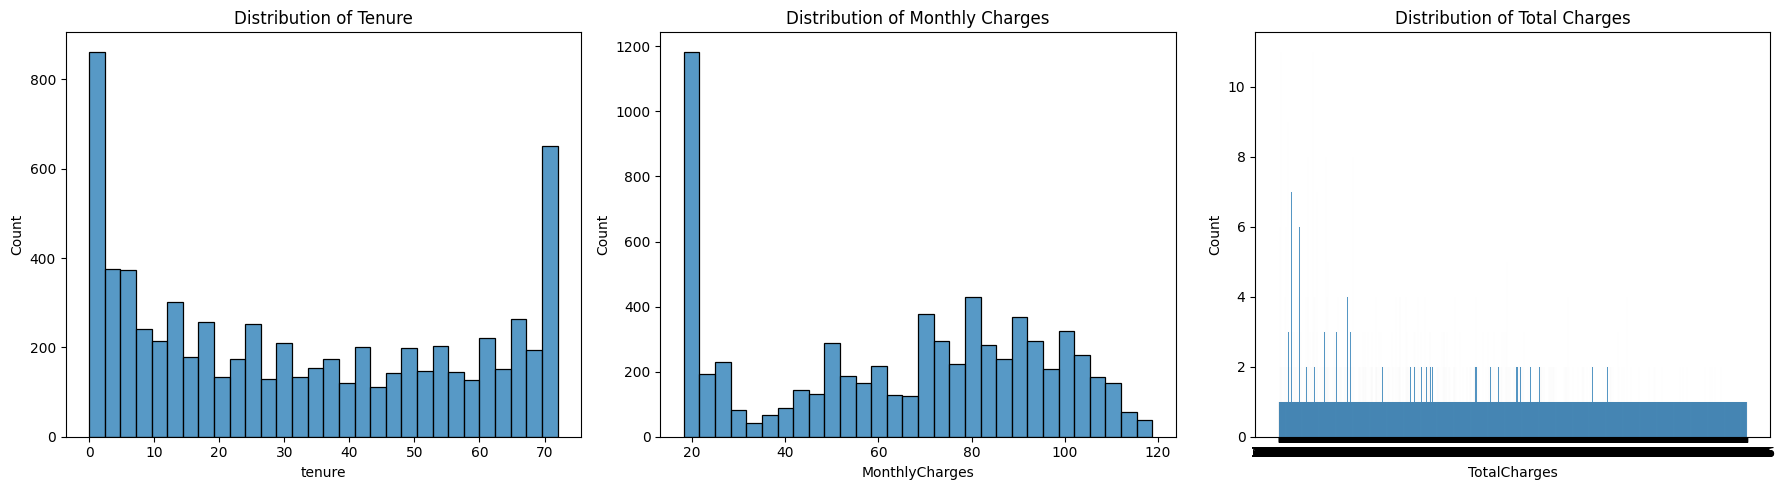

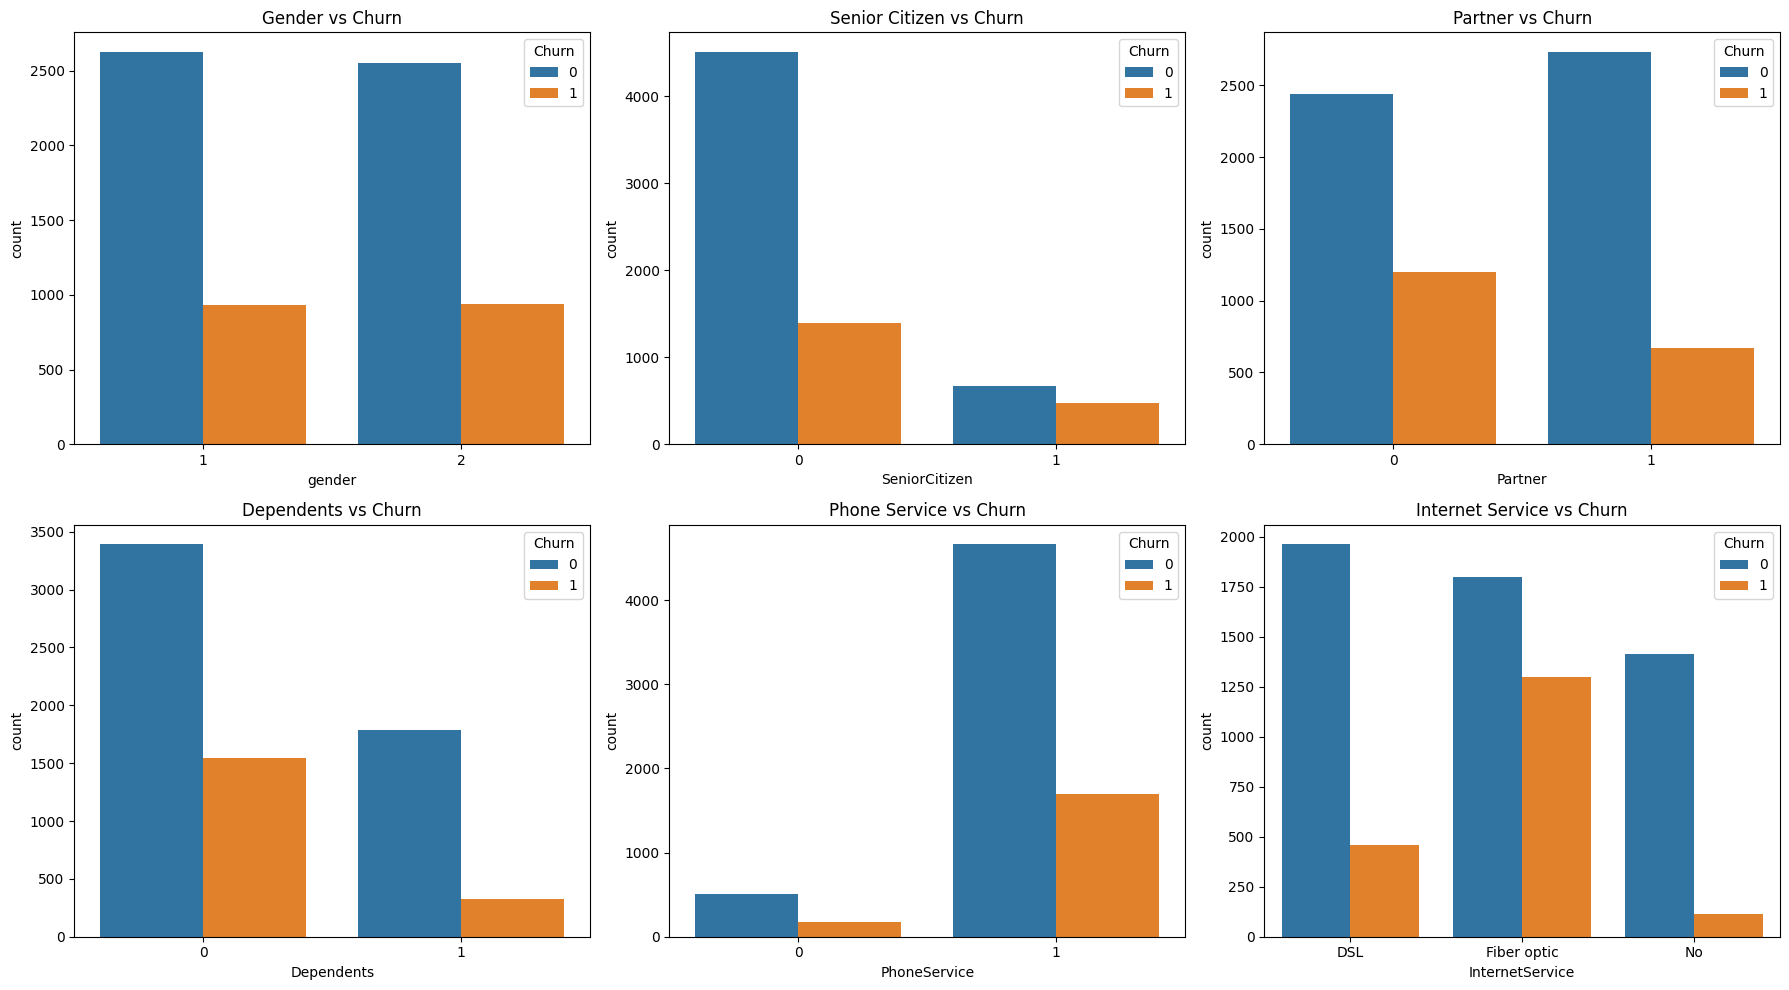

In [20]:
# Distribution of numerical features
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['tenure'], bins=30, ax=axes[0])
sns.histplot(df['MonthlyCharges'], bins=30, ax=axes[1])
sns.histplot(df['TotalCharges'], bins=30, ax=axes[2])
axes[0].set_title('Distribution of Tenure')
axes[1].set_title('Distribution of Monthly Charges')
axes[2].set_title('Distribution of Total Charges')
plt.tight_layout()
plt.show()

# Distribution of categorical features
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
sns.countplot(x='gender', hue='Churn', data=df, ax=axes[0, 0])
sns.countplot(x='SeniorCitizen', hue='Churn', data=df, ax=axes[0, 1])
sns.countplot(x='Partner', hue='Churn', data=df, ax=axes[0, 2])
sns.countplot(x='Dependents', hue='Churn', data=df, ax=axes[1, 0])
sns.countplot(x='PhoneService', hue='Churn', data=df, ax=axes[1, 1])
sns.countplot(x='InternetService', hue='Churn', data=df, ax=axes[1, 2])
axes[0, 0].set_title('Gender vs Churn')
axes[0, 1].set_title('Senior Citizen vs Churn')
axes[0, 2].set_title('Partner vs Churn')
axes[1, 0].set_title('Dependents vs Churn')
axes[1, 1].set_title('Phone Service vs Churn')
axes[1, 2].set_title('Internet Service vs Churn')
plt.tight_layout()
plt.show()

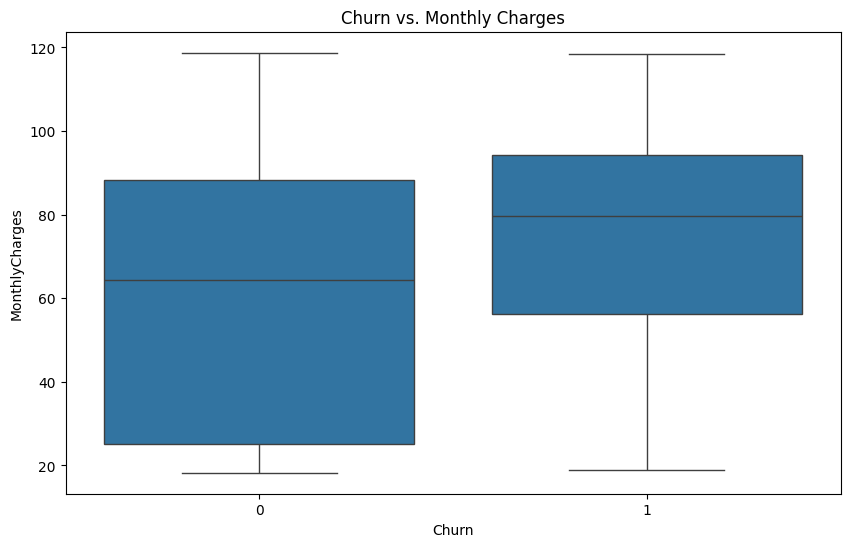

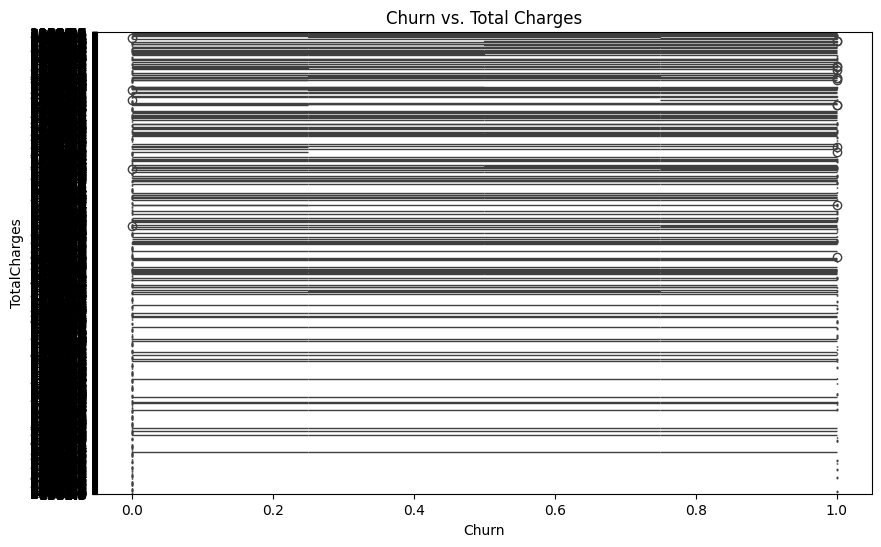

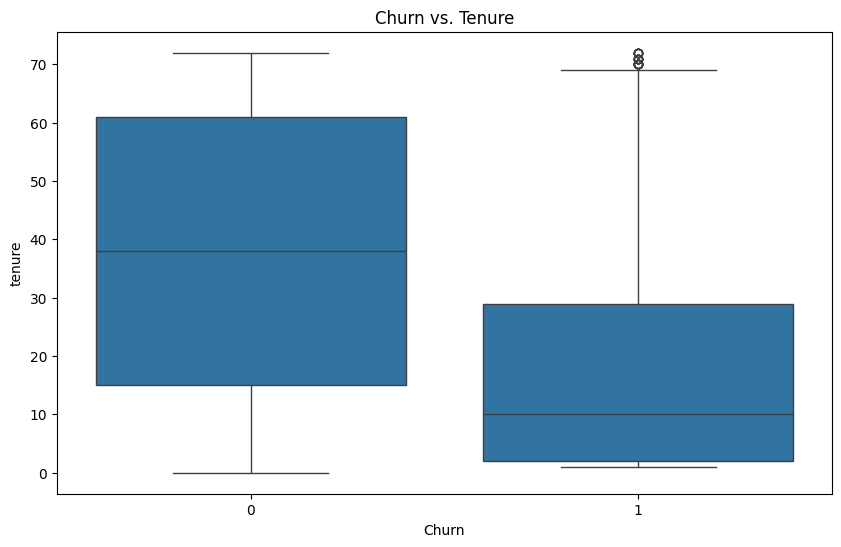

In [21]:
# Churn vs. MonthlyCharges
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Churn vs. Monthly Charges')
plt.show()

# Churn vs. TotalCharges
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='TotalCharges', data=df)
plt.title('Churn vs. Total Charges')
plt.show()

# Churn vs. Tenure
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='tenure', data=df)
plt.title('Churn vs. Tenure')
plt.show()

In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [23]:
# Drop duplicate columns if any
df = df.loc[:, ~df.columns.duplicated()]

# Drop unnecessary columns (like customerID or duplicate columns)
df = df.drop(columns=['customerID', 'InternetService.1'])

# Handle missing values if necessary (example: drop rows with missing target values)
df = df.dropna(subset=['Churn'])

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Split the data into features and target variable
X = df.drop('Churn', axis=1)
y = df['Churn']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [25]:
# using Logistic Regression
lg = LogisticRegression()
lg.fit(X_train, y_train)
y_pred = lg.predict(X_test)

print(f"""
      using Logistic Regression
       accuracy_score: {accuracy_score(y_test, y_pred)} 
    confusion_matrix: {confusion_matrix(y_test, y_pred)} 
    classification_report: {classification_report(y_test, y_pred)} 
    """)




      using Logistic Regression
       accuracy_score: 0.8069096071935636 
    confusion_matrix: [[1398  141]
 [ 267  307]] 
    classification_report:               precision    recall  f1-score   support

           0       0.84      0.91      0.87      1539
           1       0.69      0.53      0.60       574

    accuracy                           0.81      2113
   macro avg       0.76      0.72      0.74      2113
weighted avg       0.80      0.81      0.80      2113
 
    


In [26]:
# using Random Forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(f"""
        using Random Forest
         accuracy_score: {accuracy_score(y_test, y_pred)}
    confusion_matrix: {confusion_matrix(y_test, y_pred)}
    classification_report: {classification_report(y_test, y_pred)}
    """)


        using Random Forest
         accuracy_score: 0.7898722195929957
    confusion_matrix: [[1406  133]
 [ 311  263]]
    classification_report:               precision    recall  f1-score   support

           0       0.82      0.91      0.86      1539
           1       0.66      0.46      0.54       574

    accuracy                           0.79      2113
   macro avg       0.74      0.69      0.70      2113
weighted avg       0.78      0.79      0.78      2113

    


In [30]:
# using Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print(f"""
        using Decision Tree
         accuracy_score: {accuracy_score(y_test, y_pred)}
    confusion_matrix: {confusion_matrix(y_test, y_pred)}
    classification_report: {classification_report(y_test, y_pred)}
    """)


        using Decision Tree
         accuracy_score: 0.7288215806909607
    confusion_matrix: [[1266  273]
 [ 300  274]]
    classification_report:               precision    recall  f1-score   support

           0       0.81      0.82      0.82      1539
           1       0.50      0.48      0.49       574

    accuracy                           0.73      2113
   macro avg       0.65      0.65      0.65      2113
weighted avg       0.72      0.73      0.73      2113

    
